### `We're going to write the logic mechanisms of our flood risk prediction models` 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('sensor_data_streamed.csv')
df.head()

,time_and_date,air_pressure,temperature,wind_direction,humidity,wind_speed,precipitation,soil_moisture,flood_risk
0,2024-09-19 15:16:22,990.09,21.17,350.97,88.35,9.10,853.93,63.13,High
1,2024-09-19 15:17:01,1035.24,32.16,296.20,42.82,2.33,755.13,60.72,High
2,2024-09-19 15:17:20,1018.12,13.19,109.36,70.13,14.83,690.13,16.79,Low
3,2024-09-19 15:17:26,1012.84,56.66,288.22,87.36,11.12,994.52,39.88,High
4,2024-09-19 15:17:41,1010.43,1.92,17.62,69.69,12.14,565.79,11.66,Low


In [23]:
df.columns

Index(['time_and_date', 'air_pressure', 'temperature', 'wind_direction',
       'humidity', 'wind_speed', 'precipitation', 'soil_moisture',
       'flood_risk'],
      dtype='object')

In [4]:
df['time_and_date'] = pd.to_datetime(df['time_and_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1864 entries, 0 to 1863
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   time_and_date   1864 non-null   datetime64[ns]
 1   air_pressure    1864 non-null   float64       
 2   temperature     1864 non-null   float64       
 3   wind_direction  1864 non-null   float64       
 4   humidity        1864 non-null   float64       
 5   wind_speed      1864 non-null   float64       
 6   precipitation   1864 non-null   float64       
 7   soil_moisture   1864 non-null   float64       
 8   flood_risk      1864 non-null   object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 131.2+ KB


In [5]:
max(df.time_and_date), min(df.time_and_date)

(Timestamp('2024-09-19 19:47:49'), Timestamp('2024-09-19 15:16:22'))

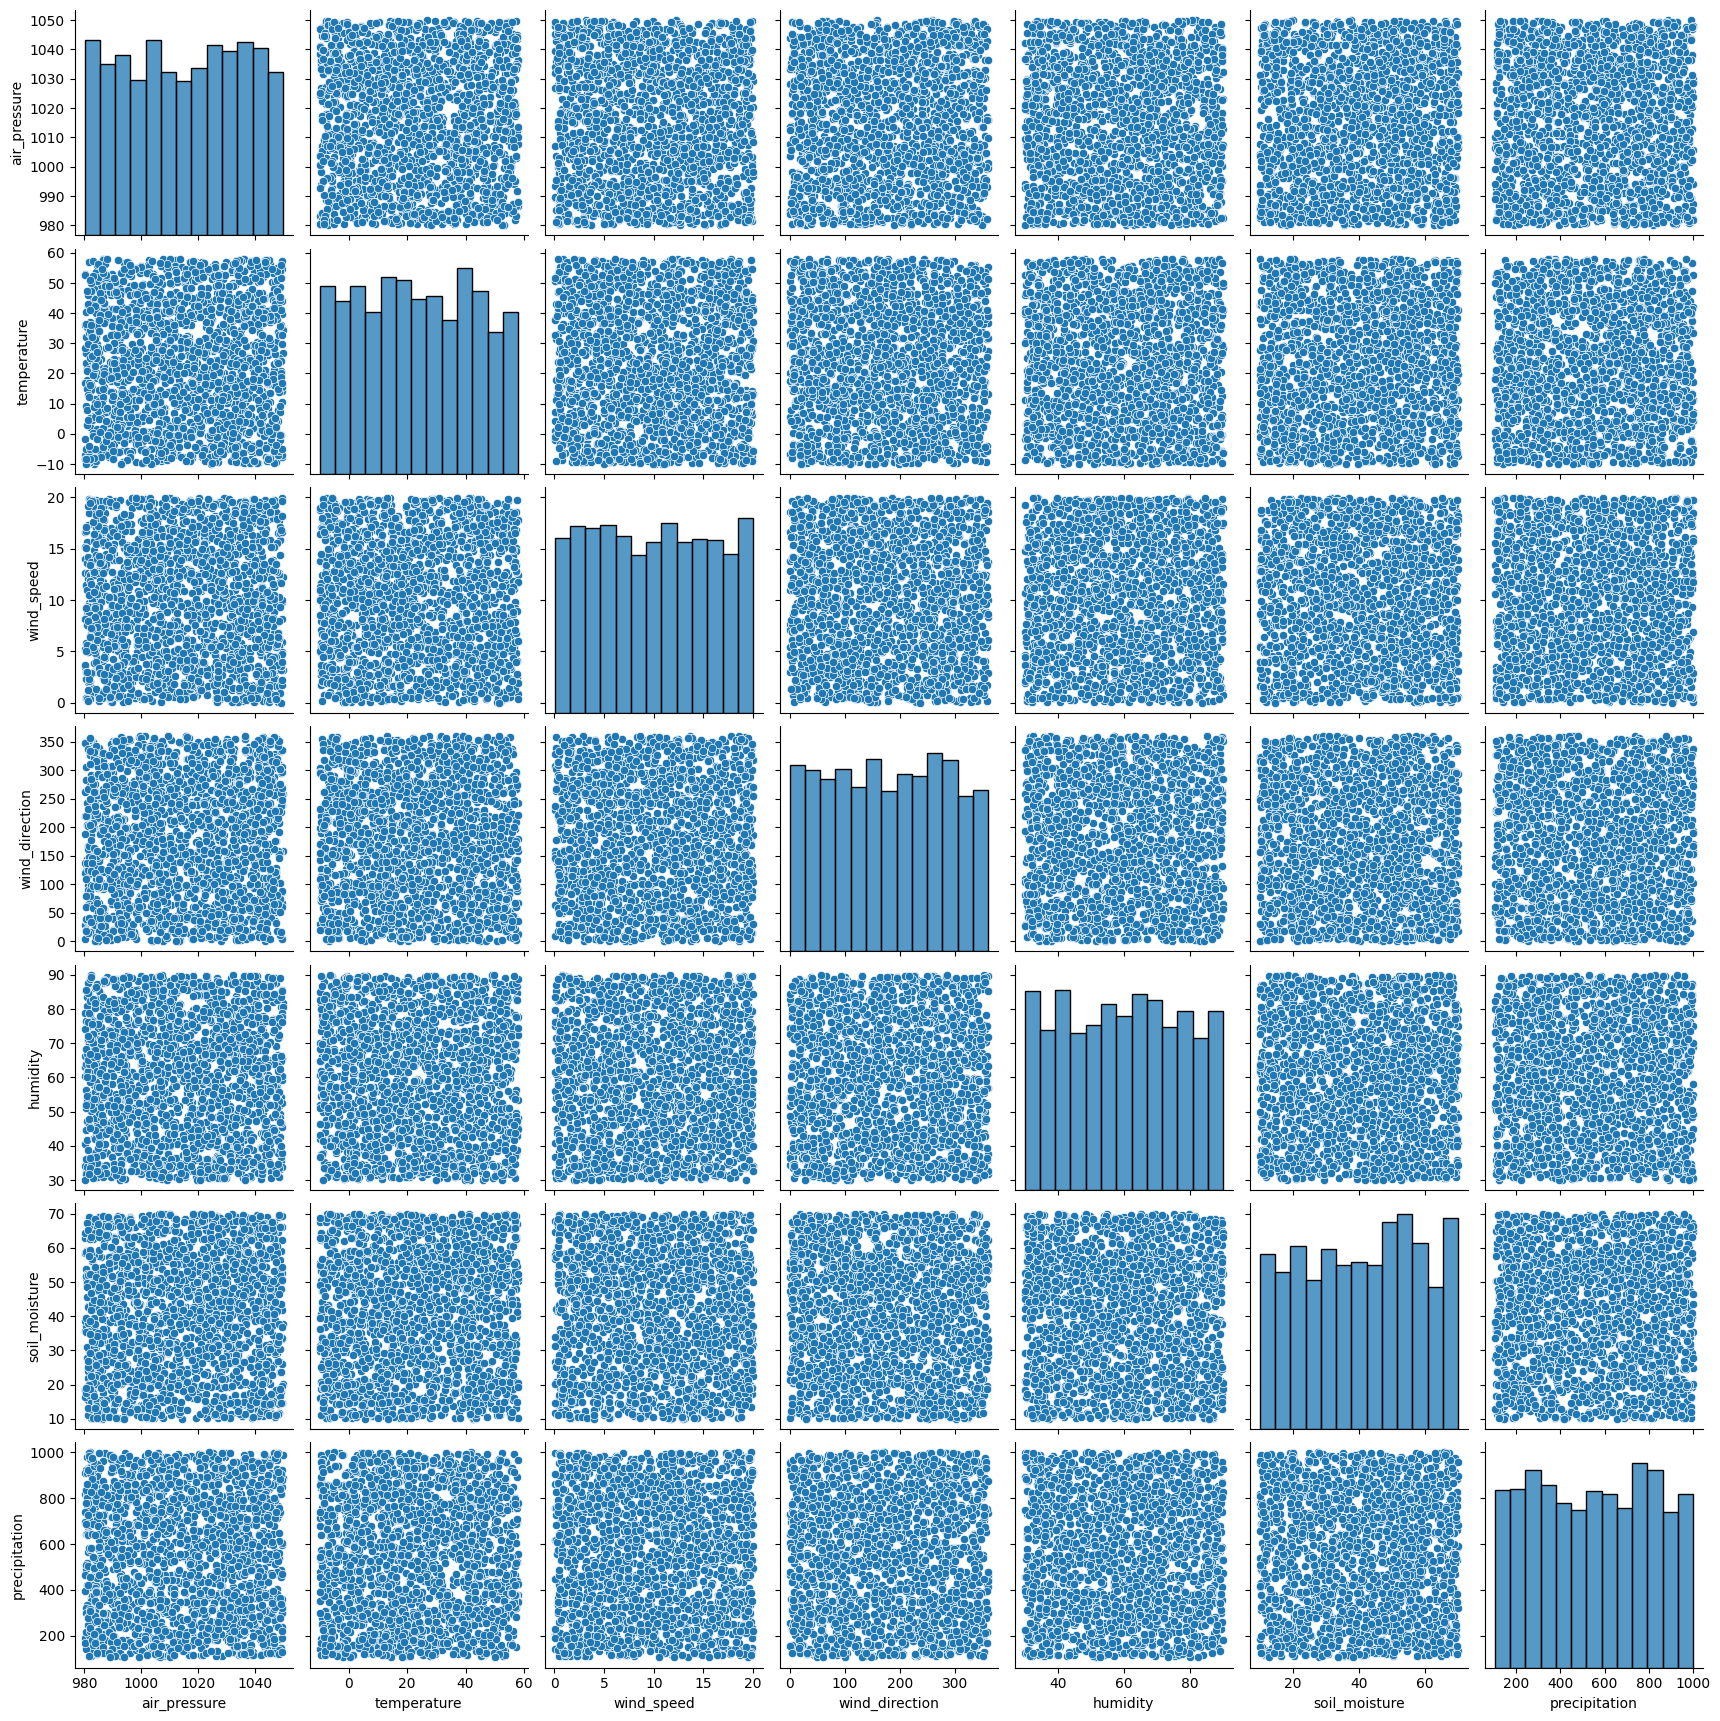

In [6]:
numerical_features = ['air_pressure', 'temperature', 'wind_speed', 'wind_direction', 'humidity', 'soil_moisture', 'precipitation']
targeted_feature = 'precipitation'

sns.pairplot(df[numerical_features])

In [7]:
corr_mmatrix = df[numerical_features].corr()
corr_mmatrix

,air_pressure,temperature,wind_speed,wind_direction,humidity,soil_moisture,precipitation
air_pressure,1.000000,-0.003295,0.010279,0.028019,-0.020562,0.064045,-0.002069
temperature,-0.003295,1.000000,-0.019704,-0.004614,-0.007907,0.032628,-0.004523
wind_speed,0.010279,-0.019704,1.000000,-0.018700,0.013895,-0.017493,0.000337
wind_direction,0.028019,-0.004614,-0.018700,1.000000,-0.012052,0.006455,0.002307
humidity,-0.020562,-0.007907,0.013895,-0.012052,1.000000,-0.003628,-0.010165
soil_moisture,0.064045,0.032628,-0.017493,0.006455,-0.003628,1.000000,-0.043374
precipitation,-0.002069,-0.004523,0.000337,0.002307,-0.010165,-0.043374,1.000000


<Axes: >

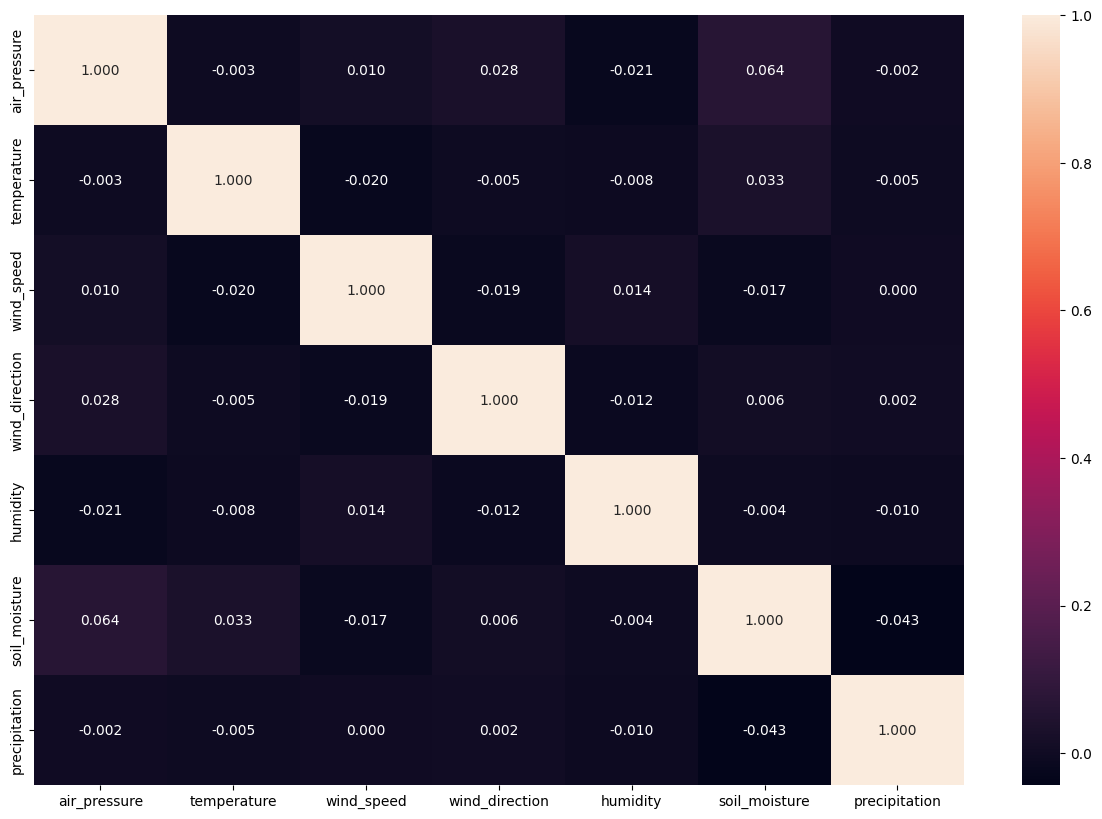

In [8]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mmatrix, annot=True, fmt='.3f')

In [9]:
features = corr_mmatrix['precipitation'].sort_values(ascending=False)
features

precipitation     1.000000
wind_direction    0.002307
wind_speed        0.000337
air_pressure     -0.002069
temperature      -0.004523
humidity         -0.010165
soil_moisture    -0.043374
Name: precipitation, dtype: float64

 We see that soil_moisture, humidity, temperature, air_pressure, and temperature contribute negatively and positively to the precipitation predictions

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df[numerical_features].drop('precipitation', axis=1)
y = df[targeted_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

lr_mae = metrics.mean_absolute_error(y_test, lr_pred)
lr_mse = metrics.mean_squared_error(y_test, lr_pred)
lr_r2 = metrics.r2_score(y_test, lr_pred)

print(f'MAE: {lr_mae}\nMSE: {lr_mse}\nR2 Score: {lr_r2}')

MAE: 229.20106604167648
MSE: 68790.52755957973
R2 Score: -0.006345401226937719


In [11]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

dtr_pred = dtr.predict(X_test)

dtr_mae = metrics.mean_absolute_error(y_test, dtr_pred)
dtr_mse = metrics.mean_squared_error(y_test, dtr_pred)
dtr_r2 = metrics.r2_score(y_test, dtr_pred)

print(f'MAE: {dtr_mae}\nMSE: {dtr_mse}\nR2 Score: {dtr_r2}')

MAE: 293.1737678571429
MSE: 134001.73055017856
R2 Score: -0.9603284068264719


In [12]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
rfr.fit(X_train, y_train)

rfr_pred = rfr.predict(X_test)


rfr_mae = metrics.mean_absolute_error(y_test, rfr_pred)
rfr_mse = metrics.mean_squared_error(y_test, rfr_pred)
rfr_r2 = metrics.r2_score(y_test, rfr_pred)

print(f'MAE: {rfr_mae}\nMSE: {rfr_mse}\nR2 Score: {rfr_r2}')

MAE: 230.11363073625424
MSE: 69665.29903152175
R2 Score: -0.01914254465850873


In [13]:
data = {

    'Models': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [lr_mae, dtr_mae, rfr_mae],
    'MSE': [lr_mse, dtr_mse, rfr_mse],
    'R2 Score': [lr_r2, dtr_r2, rfr_r2]

}
data = pd.DataFrame(data)
data

,Models,MAE,MSE,R2 Score
0,Linear Regression,229.201066,68790.527560,-0.006345
1,Decision Tree,293.173768,134001.730550,-0.960328
2,Random Forest,230.113631,69665.299032,-0.019143


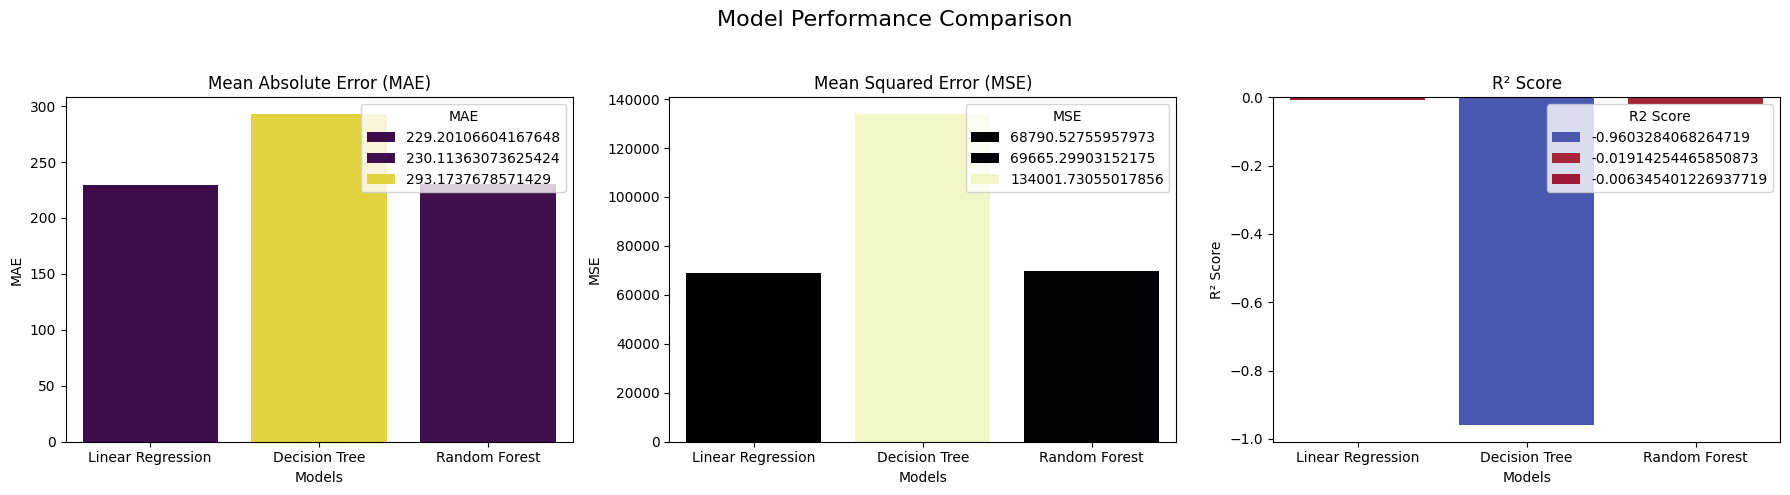

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame containing performance metrics
data = {
    'Models': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [lr_mae, dtr_mae, rfr_mae],
    'MSE': [lr_mse, dtr_mse, rfr_mse],
    'R2 Score': [lr_r2, dtr_r2, rfr_r2]
}
df = pd.DataFrame(data)

# Set up the plotting environment
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)
fig.suptitle("Model Performance Comparison", fontsize=16)

# Visualization for MAE
sns.barplot(data=df, x='Models', y='MAE', ax=axes[0], palette="viridis", hue='MAE')
axes[0].set_title("Mean Absolute Error (MAE)")
axes[0].set_ylabel("MAE")

# Visualization for MSE
sns.barplot(data=df, x='Models', y='MSE', ax=axes[1], palette="magma", hue='MSE')
axes[1].set_title("Mean Squared Error (MSE)")
axes[1].set_ylabel("MSE")

# Visualization for R² Score
sns.barplot(data=df, x='Models', y='R2 Score', ax=axes[2], palette="coolwarm", hue='R2 Score')
axes[2].set_title("R² Score")
axes[2].set_ylabel("R² Score")

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
